In [30]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
#from root_gnn.src.datasets.ditaumass import DiTauMassDataset
#from root_gnn.src.datasets.ditaumass_with_jets import DiTauMassWithJetsDataset
#from root_gnn.src.datasets.ditau_classify import DiTauClassified
#from root_gnn.src.datasets.ditau_classify_jetInfo import JetInfoClassified
#from root_gnn.src.datasets.tauid_knn import TauidKNN
from root_gnn.src.datasets.tauid import TauIdentificationDataset
#KNN = dataset = TauidKNN() 
tauid = TauIdentificationDataset()


def get_num_track_tower(event):
    """
    Get the number of tracks and towers per jet in the event
    OUTPUT: a tuple (ntrack_per_jet, ntower_per_jet), where each element in it is an array of the number of tracks or towers, 
    with length = number of jets in the event
    """

    ntrack_per_jet = [event.JetGhostTrackN[indv_jet] for indv_jet in range(event.nJets)]
    ntower_per_jet = [event.JetTowerN[indv_jet] for indv_jet in range(event.nJets)]

    return ntrack_per_jet, ntower_per_jet
        
        
def display_graph(event, dataset, i=0, print_graph=False, **kwargs):
    """
    Display the graph for a given event
    """
    
    graph = dataset.make_graph(event, **kwargs)
    if len(graph) <= i or graph[i][0] is None:
        return None
    
     
    input_graph, output_graph = graph[i]
    if print_graph:
        print(input_graph)
    ntrack, ntower = get_num_track_tower(event)
    if "track_lim" in kwargs:
        ntrack = [kwargs['track_lim']]
    if "tower_lim" in kwargs:
        ntower = [kwargs['tower_lim']]
    
    
    def g_display(input_graph, ntrack, ntower):
    
        g = nx.DiGraph()

        # add nodes
        nodes = np.array(input_graph.nodes, dtype=np.float32)
        [g.add_node(i, attribute=nodes[i]) for i in range(int(input_graph.n_node))]

        # add edges
        senders = np.array(input_graph.senders, dtype=np.int8)
        receivers = np.array(input_graph.receivers, dtype=np.int8)
        edge_lists = [i for i in zip(senders, receivers)]
        g.add_edges_from(edge_lists)

        plt.figure(figsize=(4, 4))
        pos = nx.kamada_kawai_layout(g)


        node_seq = []
        for i, j in zip(ntower, ntrack):
            for k in range(i):
                node_seq.append("tower")
            for l in range(j):
                node_seq.append("track")
                
        #[print(f"{i}:", g.nodes()[i]["attribute"], node_seq[i]) for i in g.nodes()]
        for i in g.nodes():
            if g.nodes()[i] != None and "attribute" in g.nodes()[i]:
                print(f"{i}:", g.nodes()[i]["attribute"], node_seq[i])
            else:
                print(f"{i}", g.nodes()[i], node_seq[i])
        
        print(f"Globals: {np.array(input_graph.globals, dtype=np.float32)[0]}")
        colors = ['#7acaff' if node_seq[i]=="track" else '#ff6b6b' for i in g.nodes()]
        if len(node_seq) >= 30:
            #pos = nx.spring_layout(g)
            nx.draw(g, pos, node_size=50, alpha=0.85, node_color=colors, with_labels=False)
        else:
            nx.draw(g, pos, node_size=1000, alpha=0.85, node_color=colors, with_labels=True)

        plt.show()
        
    print("INPUT GRAPH:")
    g_display(input_graph, ntrack, ntower)
    print("OUTPUT GRAPH:")
    g_display(output_graph, ntrack, ntower)

In [2]:
def graphing(evt_num, dataset=tauid, **kwargs):
    
    # Convert root file(s) into events
    filename = '/global/homes/x/xju/m3443/data/TauStudies/v5/ditau_train.root'
    file = dataset.read(filename, 0, evt_num*10)
    for i in range(evt_num):
        ditau_evt = next(file)
        
    display_graph(ditau_evt, dataset, **kwargs)

Total 480,645 Events
INPUT GRAPH:
0: [0.37358287 0.9734176  0.9272647 ] track
1: [1.         0.9830374  0.90799785] track
2: [0.58463687 0.9875217  0.86307645] tower
3: [0.9745616  0.9843566  0.91073716] tower
4: [0.9985728  0.9836685  0.90633094] tower
5: [1.        0.9821753 0.911468 ] tower
6: [ 1.         0.9817783 -0.9099029] track
7: [ 0.9999845   0.98164415 -0.90292317] track
8: [ 0.9971256   0.9801025  -0.91045105] track
9: [ 0.9977065   0.9806532  -0.94013375] tower
10: [ 1.         0.9802773 -0.8851985] tower
11: [ 0.9999971  0.9787892 -0.9143679] tower
12: [ 0.98875165  0.9805305  -0.9139171 ] tower
Globals: [0.]


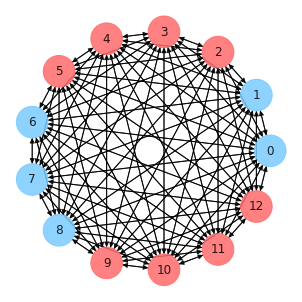

OUTPUT GRAPH:
0: [0.37358287 0.9734176  0.9272647 ] track
1: [1.         0.9830374  0.90799785] track
2: [0.58463687 0.9875217  0.86307645] tower
3: [0.9745616  0.9843566  0.91073716] tower
4: [0.9985728  0.9836685  0.90633094] tower
5: [1.        0.9821753 0.911468 ] tower
6: [ 1.         0.9817783 -0.9099029] track
7: [ 0.9999845   0.98164415 -0.90292317] track
8: [ 0.9971256   0.9801025  -0.91045105] track
9: [ 0.9977065   0.9806532  -0.94013375] tower
10: [ 1.         0.9802773 -0.8851985] tower
11: [ 0.9999971  0.9787892 -0.9143679] tower
12: [ 0.98875165  0.9805305  -0.9139171 ] tower
Globals: [47.323803   2.3708117  1.5088648 53.862286   2.3267343 -1.5160909]


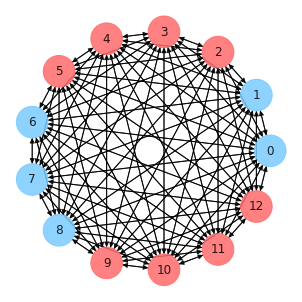

In [16]:
# Original Graph with All Jets Connected
graphing(7)

Total 480,645 Events
INPUT GRAPH:
0: [0.37358287 0.9734176  0.9272647 ] track
1: [1.         0.9830374  0.90799785] track
2: [0.58463687 0.9875217  0.86307645] tower
3: [0.9745616  0.9843566  0.91073716] tower
4: [0.9985728  0.9836685  0.90633094] tower
5: [1.        0.9821753 0.911468 ] tower
6: [ 1.         0.9817783 -0.9099029] track
7: [ 0.9999845   0.98164415 -0.90292317] track
8: [ 0.9971256   0.9801025  -0.91045105] track
9: [ 0.9977065   0.9806532  -0.94013375] tower
10: [ 1.         0.9802773 -0.8851985] tower
11: [ 0.9999971  0.9787892 -0.9143679] tower
12: [ 0.98875165  0.9805305  -0.9139171 ] tower
Globals: [0.]


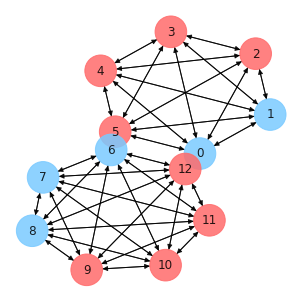

OUTPUT GRAPH:
0: [0.37358287 0.9734176  0.9272647 ] track
1: [1.         0.9830374  0.90799785] track
2: [0.58463687 0.9875217  0.86307645] tower
3: [0.9745616  0.9843566  0.91073716] tower
4: [0.9985728  0.9836685  0.90633094] tower
5: [1.        0.9821753 0.911468 ] tower
6: [ 1.         0.9817783 -0.9099029] track
7: [ 0.9999845   0.98164415 -0.90292317] track
8: [ 0.9971256   0.9801025  -0.91045105] track
9: [ 0.9977065   0.9806532  -0.94013375] tower
10: [ 1.         0.9802773 -0.8851985] tower
11: [ 0.9999971  0.9787892 -0.9143679] tower
12: [ 0.98875165  0.9805305  -0.9139171 ] tower
Globals: [47.323803   2.3708117  1.5088648 53.862286   2.3267343 -1.5160909]


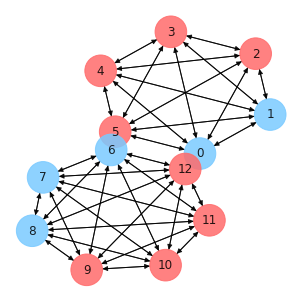

In [18]:
# New Graphs with All Jets Separated
graphing(7)

Total 480,645 Events
INPUT GRAPH:
0: [ 1.         -0.96649057  0.93064857] tower
1: [ 1.        -0.958666  -0.9097839] tower
2: [ 1.          0.7017579  -0.93166536] tower
Globals: [0.]


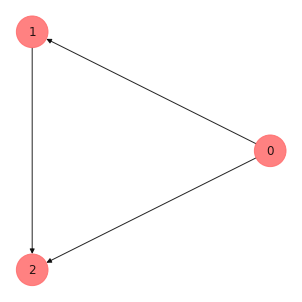

OUTPUT GRAPH:
0: [ 1.         -0.96649057  0.93064857] tower
1: [ 1.        -0.958666  -0.9097839] tower
2: [ 1.          0.7017579  -0.93166536] tower
Globals: [200.30832]


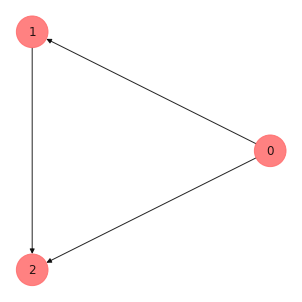

In [8]:
# Inv Mass with Jets Info Only
graphing(17)

In [ ]:
graphing(17)

Welcome to JupyROOT 6.24/02


2022-02-21 12:50:52.553974: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-21 12:50:52.554034: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cori16): /proc/driver/nvidia/version does not exist
2022-02-21 12:50:52.554885: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INPUT GRAPH:
0: [ 0.00594132  0.3020684  -0.45056987] tower
1: [ 0.00366886  0.22558454 -0.47494814] tower
2: [ 0.00057951  0.38796064 -0.5535402 ] tower
3: [ 0.00277724  0.33915263 -0.55674195] track
4: [ 0.01143539  0.3214905  -0.5292553 ] tower
5: [ 0.00404601  0.24528979 -0.5723129 ] track
6: [ 0.00434304  0.30540803 -0.5492876 ] track
7: [ 0.0038228   0.29361323 -0.5433519 ] track
8: [ 0.01785447  0.2667589  -0.5514955 ] track
9: [ 0.00072268  0.20421338 -0.50698966] track
10: [ 0.00256049  0.21377765 -0.50799364] track
11: [ 0.00230436  0.21214148 -0.530381  ] track
12: [ 0.00208091  0.34634647 -0.5051124 ] track
13: [ 0.00135108  0.31453326 -0.515627  ] track
14: [ 0.00981412  0.30112618 -0.5113032 ] track
15: [ 0.00460373  0.31139025 -0.5506334 ] tower
16: [ 0.00298995  0.29544944 -0.5633202 ] tower
17: [ 0.00115336  0.247802   -0.5546053 ] tower
18: [ 0.00435034  0.26080427 -0.5378702 ] tower
Globals: [19.]


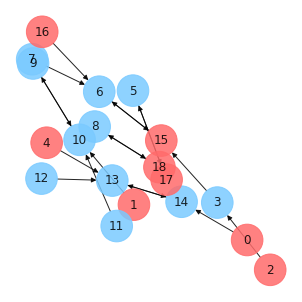

OUTPUT GRAPH:
0: [ 0.00594132  0.3020684  -0.45056987] tower
1: [ 0.00366886  0.22558454 -0.47494814] tower
2: [ 0.00057951  0.38796064 -0.5535402 ] tower
3: [ 0.00277724  0.33915263 -0.55674195] track
4: [ 0.01143539  0.3214905  -0.5292553 ] tower
5: [ 0.00404601  0.24528979 -0.5723129 ] track
6: [ 0.00434304  0.30540803 -0.5492876 ] track
7: [ 0.0038228   0.29361323 -0.5433519 ] track
8: [ 0.01785447  0.2667589  -0.5514955 ] track
9: [ 0.00072268  0.20421338 -0.50698966] track
10: [ 0.00256049  0.21377765 -0.50799364] track
11: [ 0.00230436  0.21214148 -0.530381  ] track
12: [ 0.00208091  0.34634647 -0.5051124 ] track
13: [ 0.00135108  0.31453326 -0.515627  ] track
14: [ 0.00981412  0.30112618 -0.5113032 ] track
15: [ 0.00460373  0.31139025 -0.5506334 ] tower
16: [ 0.00298995  0.29544944 -0.5633202 ] tower
17: [ 0.00115336  0.247802   -0.5546053 ] tower
18: [ 0.00435034  0.26080427 -0.5378702 ] tower
Globals: [0.]


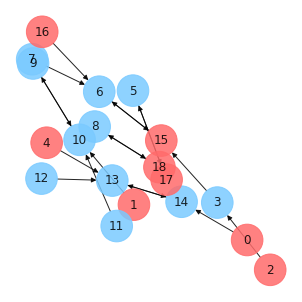

In [4]:
graphing(17)

INPUT GRAPH:
0: [ 2.9876342e-04  6.2527883e-01 -4.9776289e-01] track
1: [ 2.0838008e-04  5.1507825e-01 -3.8888359e-01] track
2: [ 0.01002779  0.5365979  -0.3757547 ] tower
3: [ 0.0018962   0.53368556 -0.4123848 ] tower
4: [ 4.7250604e-04  5.4309899e-01 -3.9669469e-01] tower
5: [ 0.00066205  0.5768137  -0.4172426 ] tower
6: [ 0.00234265  0.55797505 -0.40657023] tower
7: [ 0.00674786  0.5667099  -0.3952835 ] tower
8: [ 0.00450731  0.5725789  -0.39674136] tower
9: [ 0.00106307  0.59516275 -0.3120512 ] tower
10: [ 0.00934027  0.55650616 -0.3882513 ] tower
Globals: [11.]


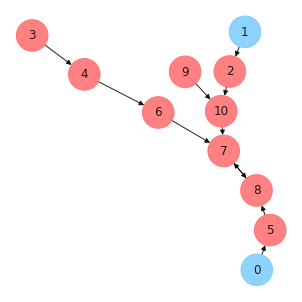

OUTPUT GRAPH:
0: [ 2.9876342e-04  6.2527883e-01 -4.9776289e-01] track
1: [ 2.0838008e-04  5.1507825e-01 -3.8888359e-01] track
2: [ 0.01002779  0.5365979  -0.3757547 ] tower
3: [ 0.0018962   0.53368556 -0.4123848 ] tower
4: [ 4.7250604e-04  5.4309899e-01 -3.9669469e-01] tower
5: [ 0.00066205  0.5768137  -0.4172426 ] tower
6: [ 0.00234265  0.55797505 -0.40657023] tower
7: [ 0.00674786  0.5667099  -0.3952835 ] tower
8: [ 0.00450731  0.5725789  -0.39674136] tower
9: [ 0.00106307  0.59516275 -0.3120512 ] tower
10: [ 0.00934027  0.55650616 -0.3882513 ] tower
Globals: [1.]


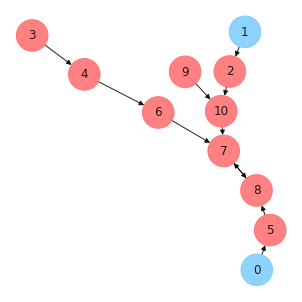

INPUT GRAPH:
0: [ 2.9876342e-04  6.2527883e-01 -4.9776289e-01] track
1: [ 2.0838008e-04  5.1507825e-01 -3.8888359e-01] track
2: [ 0.01002779  0.5365979  -0.3757547 ] tower
3: [ 0.0018962   0.53368556 -0.4123848 ] tower
4: [ 4.7250604e-04  5.4309899e-01 -3.9669469e-01] tower
5: [ 0.00066205  0.5768137  -0.4172426 ] tower
6: [ 0.00234265  0.55797505 -0.40657023] tower
7: [ 0.00674786  0.5667099  -0.3952835 ] tower
8: [ 0.00450731  0.5725789  -0.39674136] tower
9: [ 0.00106307  0.59516275 -0.3120512 ] tower
10: [ 0.00934027  0.55650616 -0.3882513 ] tower
Globals: [11.]


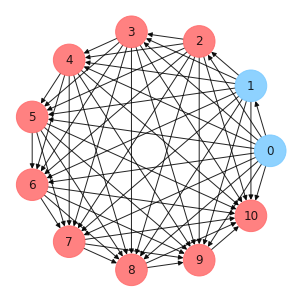

OUTPUT GRAPH:
0: [ 2.9876342e-04  6.2527883e-01 -4.9776289e-01] track
1: [ 2.0838008e-04  5.1507825e-01 -3.8888359e-01] track
2: [ 0.01002779  0.5365979  -0.3757547 ] tower
3: [ 0.0018962   0.53368556 -0.4123848 ] tower
4: [ 4.7250604e-04  5.4309899e-01 -3.9669469e-01] tower
5: [ 0.00066205  0.5768137  -0.4172426 ] tower
6: [ 0.00234265  0.55797505 -0.40657023] tower
7: [ 0.00674786  0.5667099  -0.3952835 ] tower
8: [ 0.00450731  0.5725789  -0.39674136] tower
9: [ 0.00106307  0.59516275 -0.3120512 ] tower
10: [ 0.00934027  0.55650616 -0.3882513 ] tower
Globals: [1.]


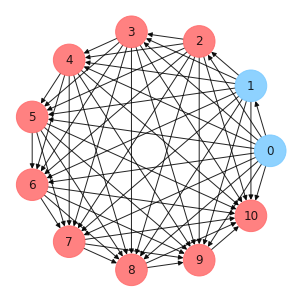

In [55]:
n = 10
graphing(n, KNN)
graphing(n, tauid)

In [11]:
def ghostTracks(jet_graph, pt, eta, phi, debug=False):
    scaling = np.array([1.0e-3,1.0/3.0,1.0/np.pi],dtype=np.float32)
    jet_eta, jet_phi = jet_graph.globals[0] * scaling[1:]
    factor = np.sqrt(1/2)*0.4 
    
    allEta = (factor * eta ) / 3 + jet_eta
    allPhi = (factor * phi ) / np.pi + jet_phi
    pt = pt/1e3
    nodes = jet_graph.nodes
    new_nodes = [_ for _ in nodes] + list(zip(pt, allEta, allPhi))
    new_graph = jet_graph.replace(nodes=new_nodes)
    return new_graph

In [10]:
#from root_gnn.rep_trainer import ghostTracks
def plotJet(evt_num, dataset=dataset, radius=0.4, unscale=False):
    filename = '/global/homes/x/xju/m3443/data/TauStudies/v1/Ntuple_ditau_processed.root'
    file = dataset.read(filename, 0, evt_num*10)
    for i in range(evt_num):
        ditau_evt = next(file)
        
    batch_size = 1
    rng = np.random.default_rng(12345)
    
    num_ghost_tracks = rng.integers(low=1, high=12, size=batch_size)
    pt = rng.random(batch_size*num_ghost_tracks) * 3
    eta = rng.random(batch_size*num_ghost_tracks) * 2 - 1
    phi = rng.random(batch_size*num_ghost_tracks) * 2 - 1
    
    graphs = dataset.make_graph(ditau_evt)
    if len(graphs) == 0:
        print("No graphs made")
        return
    graph = graphs[0][0]
    nTracks = ditau_evt.JetGhostTrackN[0]

    displayJetGraph(graph, nTracks, 0, radius, unscale)
    
    graph_id = 0
    n = num_ghost_tracks[graph_id]
    new_graph = ghostTracks(graph, pt[graph_id:graph_id+n]/n, eta[graph_id:graph_id+n], phi[graph_id:graph_id+n])
    displayJetGraph(new_graph, nTracks, n, radius, unscale)
    
def displayJetGraph(graph, nTracks, nGhosts, radius=0.4, unscale=False):
    nodes = graph.nodes
    #print(jetInfo)
    scaling = np.array([1.0e-3,1.0/3.0,1.0/np.pi],dtype=np.float32)
    jet_eta, jet_phi = graph.globals[0] * scaling[1:]
    pt = np.array([i[0] for i in nodes])
    eta = np.array([i[1] for i in nodes])
    phi = np.array([i[2] for i in nodes])
    if unscale:
        jet_eta *= 3
        jet_phi *= np.pi
        pt *= 1000
        eta *= 3
        phi *= np.pi
    mini, maxi = min(pt), max(pt)
    norm = plt.Normalize(mini, maxi)
    fig, ax = plt.subplots(figsize=(8,6))
    cm = plt.cm.get_cmap('RdYlBu')
    figure1 = ax.scatter(eta[:nTracks], phi[:nTracks], marker="X", norm=norm, c=pt[:nTracks], cmap=cm, label="Tracks by eta, phi, colored by PT values")
    figure2 = ax.scatter(eta[nTracks:len(eta)-nGhosts], phi[nTracks:len(eta)-nGhosts], norm=norm, marker="o", c=pt[nTracks:len(eta)-nGhosts], cmap=cm, label="Towers by eta, phi, colored by ET values")
    figure3 = ax.scatter(eta[len(eta)-nGhosts:], phi[len(eta)-nGhosts:], norm=norm, marker="x", c=pt[len(eta)-nGhosts:], cmap=cm, label="Ghost Tracks, colored by PT values")
    angle = np.linspace(0, 2*np.pi, 150)
    x = radius * np.cos(angle) + jet_eta
    y = radius * np.sin(angle) + jet_phi
    ax.plot(x, y, label="Radius = 0.4")
    ax.scatter(jet_eta, jet_phi, marker="+", c="k", label="center")
    ax.set_xlabel(r"$\eta$")
    ax.set_ylabel(r"$\phi$")
    ax.legend(loc="upper right")
    plt.colorbar(figure1, ax=ax)
    #plt.colorbar(figure2, ax=ax)
    #plt.colorbar(figure3, ax=ax)
    plt.tight_layout()
    plt.show()

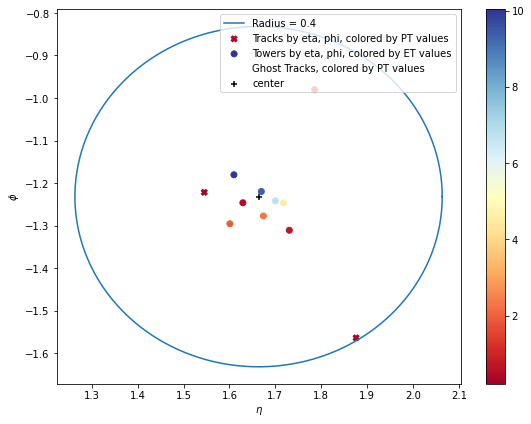

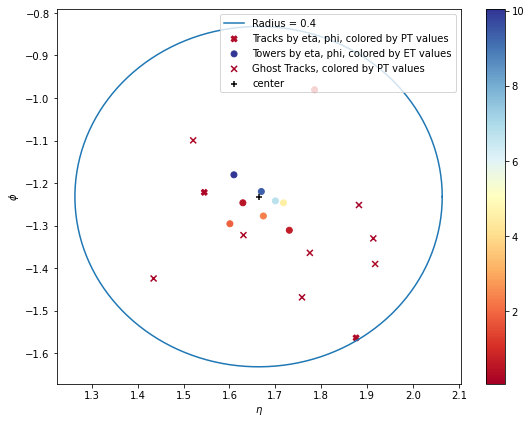

In [12]:
from root_gnn.src.datasets.tauidWithJetInfo import tauidWithJetInfo
dataset = tauidWithJetInfo()
plotJet(10, unscale=True)

In [14]:
from root_gnn.src.datasets.tauidWithGhostTracks import tauidWithGhostTracks
dataset = tauidWithGhostTracks()

filename = '/global/homes/x/xju/m3443/data/TauStudies/v1/Ntuple_ditau_processed.root'
evts = dataset.read(filename, 0, 10)
a = next(evts)
x = dataset.make_graph(a)

INPUT GRAPH:
0: [0.         1.4971747  1.291584   0.05412412 0.1619315  0.
 0.        ] tower
1: [0.         1.4971747  1.2600331  0.19088209 0.01184356 0.
 0.        ] tower
2: [0.         1.4971747  0.9372199  0.16754818 0.27703378 0.
 0.        ] tower
3: [0.         1.4971747  0.9042124  0.02635646 0.5639741  0.
 0.        ] tower
4: [0.         1.4971747  0.89423215 0.12117755 0.5380582  0.
 0.        ] tower
5: [0.         1.4971747  0.8938624  0.13299358 0.36899364 0.
 0.        ] tower
6: [ 1.          1.4971747   0.827777    0.08041608  0.16347316  1.2239745
 -0.9171512 ] track
7: [ 1.          1.4971747   0.5418379   0.1542548   0.08333258  0.75472516
 -2.        ] track
8: [ 1.          1.4971747   0.44009236  0.00470614  0.29045004  0.5548759
 -2.        ] track
9: [ 1.          1.4971747   0.4025823   0.09328294  0.26549357  1.227207
 -0.49490345] track
10: [ 1.          1.4971747   0.40178618  0.20609403  0.72271204  0.54472965
 -2.        ] track
11: [ 1.          1.4971

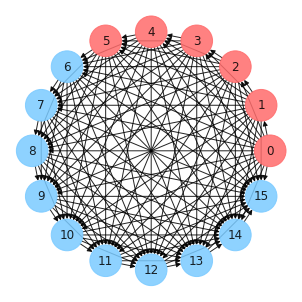

OUTPUT GRAPH:
0: [0.         1.4971747  1.291584   0.05412412 0.1619315  0.
 0.        ] tower
1: [0.         1.4971747  1.2600331  0.19088209 0.01184356 0.
 0.        ] tower
2: [0.         1.4971747  0.9372199  0.16754818 0.27703378 0.
 0.        ] tower
3: [0.         1.4971747  0.9042124  0.02635646 0.5639741  0.
 0.        ] tower
4: [0.         1.4971747  0.89423215 0.12117755 0.5380582  0.
 0.        ] tower
5: [0.         1.4971747  0.8938624  0.13299358 0.36899364 0.
 0.        ] tower
6: [ 1.          1.4971747   0.827777    0.08041608  0.16347316  1.2239745
 -0.9171512 ] track
7: [ 1.          1.4971747   0.5418379   0.1542548   0.08333258  0.75472516
 -2.        ] track
8: [ 1.          1.4971747   0.44009236  0.00470614  0.29045004  0.5548759
 -2.        ] track
9: [ 1.          1.4971747   0.4025823   0.09328294  0.26549357  1.227207
 -0.49490345] track
10: [ 1.          1.4971747   0.40178618  0.20609403  0.72271204  0.54472965
 -2.        ] track
11: [ 1.          1.497

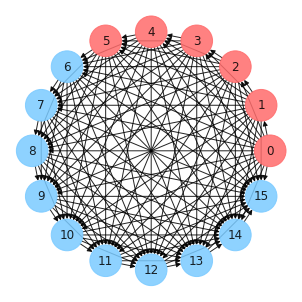

In [33]:
graphing(5, i=0, track_lim=10, tower_lim=6, print_graph=0, signal=10)